# Performance Metric Abstractions

We will learn how to determine the [computational complexity](https://en.wikipedia.org/wiki/Computational_complexity) of an algorithm and express that in [Big-O notation](https://en.wikipedia.org/wiki/Big_O_notation).  

While that theoretical time complexity of an algorithm sets a lower bound on how fast the computation can be completed, there are many other practical factors that can have a significant influence on an algorithm's performance.

The abstractions developed in this notebook provide some basic tools for measuring and analyzing algorithm performance.

In [12]:
%matplotlib inline

import time
import matplotlib.pyplot as plt
from functools import wraps
from timeit import timeit

## A Time Consuming Algorithm
To demonstrate the performance tools below, we just need an algorithm that takes a lot of computation.  A recursive [`Fibonacci`](https://en.wikipedia.org/wiki/Fibonacci) is an infamous example of inefficiency....

In [13]:
def fib(n):
    """ Returns the n-th Fibonacci number """
    if n < 3:
        return 1
    else:
        return fib(n-1) + fib(n-2)

assert fib(8) == 21
f"First 10 Fibonacci numbers: {[fib(i) for i in range(1, 11)]}"

'First 10 Fibonacci numbers: [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]'

## Three Ways Measure Performance
3 common tools for measuring algorithm run times:
1. `time` module's "[performance counter](https://docs.python.org/3/library/time.html?highlight=time#time.perf_counter)"
2. [`%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time) notebook "magic" 
3. [`timeit`](https://docs.python.org/3/library/timeit.html) "a simple way to time small bits of Python code"

In [14]:
# (1) Simple: record the start and end time for an algorithm, compute elapsed time 
start = time.perf_counter()
fib(33)
end= time.perf_counter()
print(f'Fib took: {end-start} seconds.\n')

# (2) %time magic does same with a single keyword - only works in notebooks!
%time fib(33)

# (3) A more robust timing tests that runs code a number of times and reports on total run time
s = timeit(lambda: fib(33),  number=5) / 5
print(f'\nFib avg. time: {s} seconds.')

Fib took: 0.38321287500002654 seconds.
CPU times: user 361 ms, sys: 12.7 ms, total: 374 ms
Wall time: 374 ms

Fib avg. time: 0.3712531499999955 seconds.


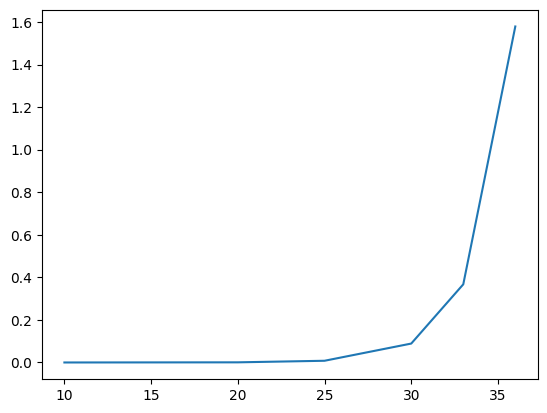

In [15]:
ns = (10, 20, 25, 30, 33, 36)
timings = [
    timeit(lambda: fib(n),  number=2)/2
        for n in ns
]
plt.plot(ns, timings) 

## A performance "decorator"
Decorators are covered in `foundations/06-higher-order-functions`
Here's a handy, reusable one for measuring and reporting on the performance of a function...

In [16]:
def performance(f):
    """ Return a decorator that will execute function f and record the time it takes to execute."""
    @wraps(f)
    def performance_timer(*args):
        start = time.perf_counter()
        v = f(*args)
        end = time.perf_counter()
        print(f'Performance of {f.__name__}{args}: {end-start} seconds.')
        return v
    return performance_timer

### Decorate any functions
This decorator can be added very quickly to any function to get a performance measure.

Here's a usage example for the amazing [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) algorithm

In [17]:
# Sample use
def sieve_of_eratosthenes(n):
    """ Returns a list of the prime numbers <=n """
    sieve = [True]*(n+3)
    for i in range(2, int(n**0.5)+1):
        if sieve[i]:
            for j in range(i*2, n+1, i):
                sieve[j] = False
    return [i for i in range(2, n) if sieve[i]]

assert sieve_of_eratosthenes(30) == [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

@performance
def largest_prime(n):
    """ Returns the largest prime that is less than n """
    if n < 2:
        return None
    return sieve_of_eratosthenes(n)[-1]

under_1m = largest_prime(1000000)
under_10m = largest_prime(10000000)
print(f"largest prime under 10M: {under_10m}")

Performance of largest_prime(1000000,): 0.07912425000000667 seconds.
Performance of largest_prime(10000000,): 1.0501771660000259 seconds.
largest prime under 10M: 9999991
